## GRIP : The Sparks Foundation


### Data Science and Business Analytics Intern

### Author : Palak Jain 

## Task 2 : Predicting optimum number of Clusters using unsupervised ML

## *Step 1 - Importing the data and some interpretation*

In [1]:
#### IMPORTING THE LIBRARIES ####

import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import warnings as wg
wg.filterwarnings('ignore')

In [2]:
# Load the Iris dataset

iris = datasets.load_iris()
iris_df = pd.read_csv(r'C:\Users\Vaibhav\Desktop\Iris data set for internship.csv')
print(iris_df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_df.shape

(150, 6)

In [6]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Step 2 - Visualizing the Data

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

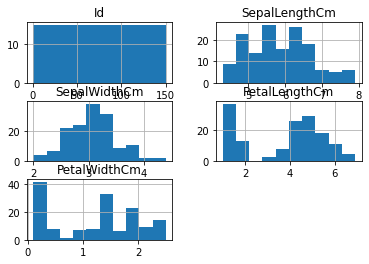

In [15]:
iris_df.hist()

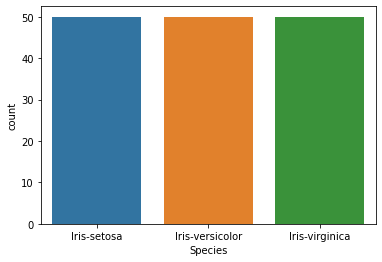

In [12]:
sns.countplot('Species',data=iris_df)
plt.show()

Iris - setosa - 50 iris - versicolor Species - 50 Iris - virginica - 50

## Step 3 - Bivariate Analysis

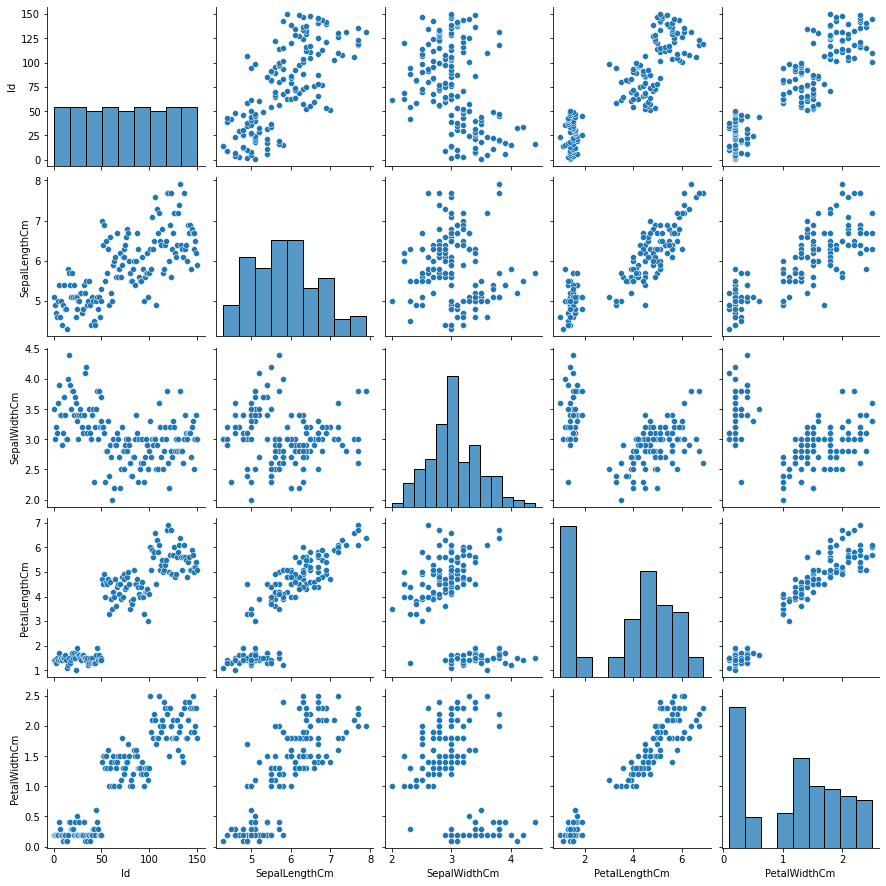

In [16]:
sns.pairplot(data=iris_df)
plt.show()

## Step 4 - Finding any Duplicate Value



In [17]:
iris_df.drop_duplicates()
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no any duplicate value.

## Step 5 - Clustering using K Means

In [18]:
data = iris_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [21]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [31]:
iris_k_mean_model = KMeans(n_clusters = 3)
iris_k_mean_model.fit(X)

KMeans(n_clusters=3)

In [22]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
X = iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

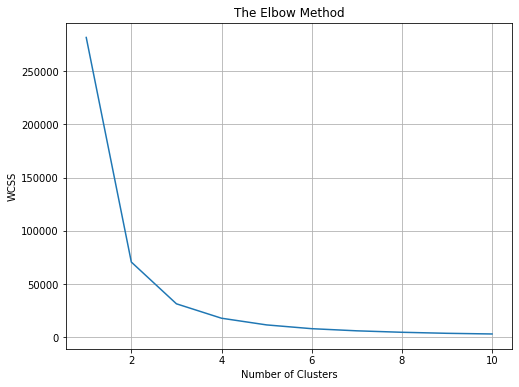

In [25]:
#Plotting the results on a line graph
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

The elbow point is the point where the within cluster of sum of squares (WCSS) does not decrease significantly with every 
iteration in our case, the elbow occurs at 3.

*Therefore, the number of clusters are 3*

In [28]:
#Applying kmeans to the dataset / Creating the kmeans classifier 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300,n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

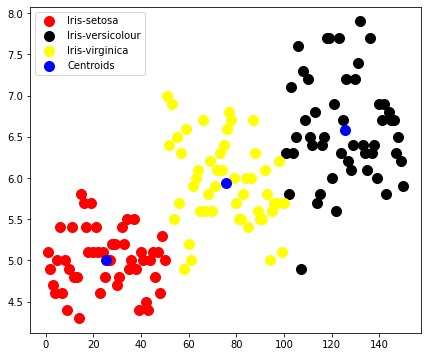

In [30]:
plt.figure(figsize =(7,6))
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s= 100,c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s= 100,c = 'black', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s= 100,c = 'yellow', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s =100, c = 'blue', label = 'Centroids')

plt.legend()

plt.show()


# Thank you for watching